In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
import matplotlib as mpl

# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "k", "c"])


iterations = 5000
n_runs = 10
L = 50
rho_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.25, 0.26, 0.27]
p_values = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]

# list of (rho, p, phi) tuples for 3D plot
data_points = [] 

# for the plots that show chronological progession
# key=rho, value=2D list, one for every p value, containing the progression of the order param
all_data = {rho : [] for rho in rho_values}

# load data from files
for rho_index, rho in enumerate(rho_values):
    for p in p_values:
        my_data = np.genfromtxt(f'./results/data/runs_{n_runs}_p_{p}_rho_{rho}_L_{L}_iters_{iterations}.csv', delimiter = ',', skip_header=1)
        my_data = my_data.T
        phi_means = my_data[1]
        phi_stds = my_data[2]
        
        
        data_points.append((rho, p, np.mean(phi_means[:-100])))

        all_data[rho].append([phi_means, phi_stds])

# Average order progression for different crowd densities
For constant soberness  (likeliness to move straight) = 0.8

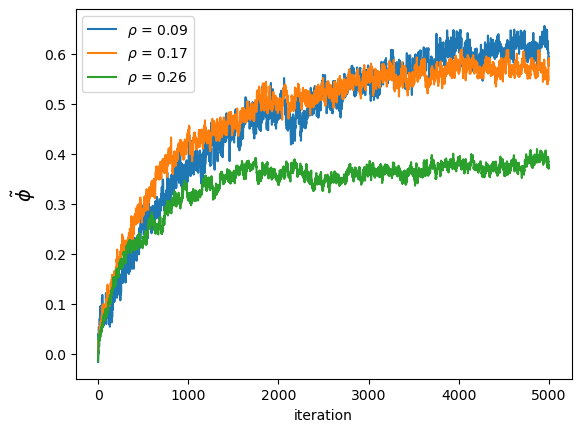

In [42]:
# plot average progression for different densities and p = 0.8
%matplotlib inline
plt.figure()
colors = cm.nipy_spectral(np.linspace(0, 1, len(rho_values)))

for rho in [0.09,0.17,0.26]:
    plt.plot(range(iterations), all_data[rho][15][0], label=f'$\\rho$ = {rho}')
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.legend()
plt.show()

# Average order progression for different probabilities of wanting to move straight
for density = 0.16

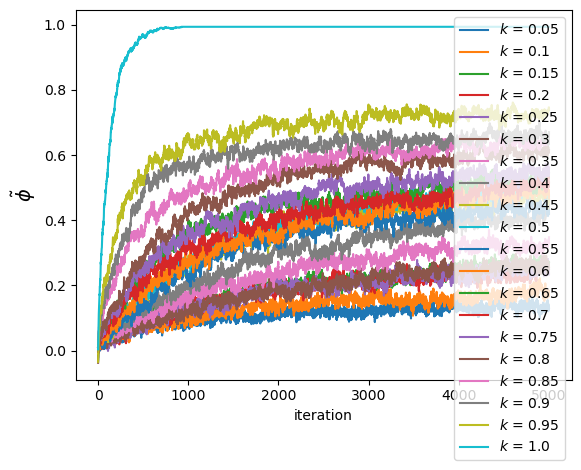

In [14]:
# plotting order progression for constant rho
plt.figure()
rho = 0.15
for i, p in enumerate(p_values):
    plt.plot(range(iterations), all_data[0.16][i][0], label=f'$k$ = {p}')
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.legend()
plt.show()

# 'converged' order param as a function of the density
This is for constant soberness value of 0.8

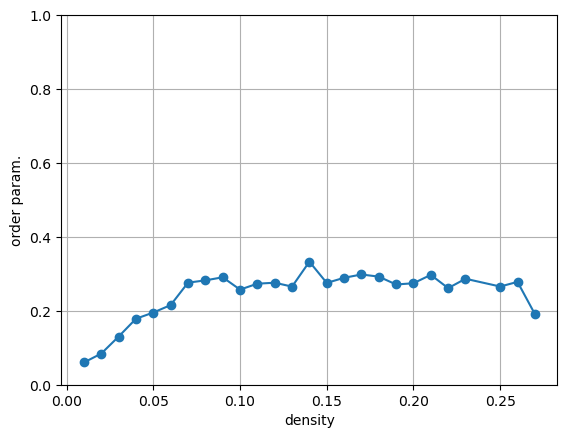

In [15]:
# p = 0.8

plt.figure()
plt.plot(rho_values, [np.mean(all_data[rho][7][0][:-100]) for rho in rho_values], 'o-')
plt.xlabel('$density$')
plt.ylabel('$\\tilde{\phi}$')
plt.grid()
plt.ylim(0, 1)
plt.show()

# 'converged' order param. as a function of soberness
This is for constant density of 0.16

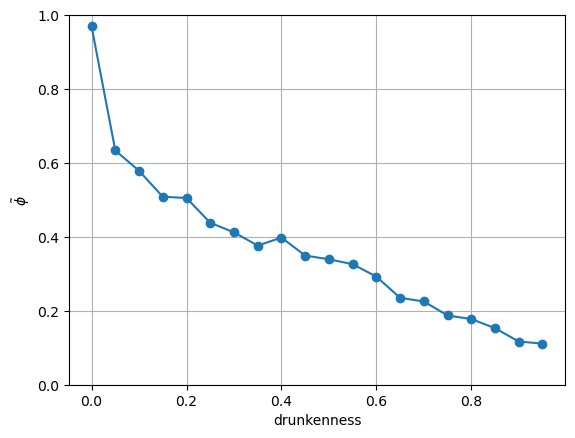

In [25]:
rho = 0.18
plt.figure()
drunk_values=[]
for p in p_values:
    drunk_values.append(1-p) 
plt.plot(drunk_values, [np.mean(all_data[rho][i][0][:-100]) for i in range(len(p_values))], 'o-')
plt.xlabel('drunkenness')
plt.ylabel('$\\tilde{\phi}$')
plt.grid()
plt.ylim(0, 1)
plt.show()

# confidence interval for one density, one drunkness value progression of line plot

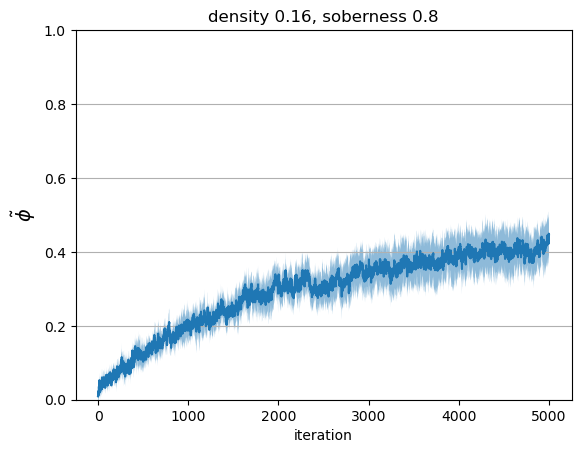

In [17]:
# plotting order progression for constant rho
plt.figure()
rho = 0.16
p = 0.8 

plt.plot(range(iterations), all_data[rho][7][0], label=f'k = 0.8')
plt.fill_between(x=range(iterations), y1=all_data[rho][7][0]-1.96*all_data[rho][7][1]/np.sqrt(10), y2=all_data[rho][7][0]+1.96*all_data[rho][7][1]/np.sqrt(10), alpha=0.5)
plt.ylabel('$\\tilde{\phi}$', fontsize=14)
plt.xlabel('iteration')
plt.title(f'density {rho}, soberness {p}')
# plt.legend()
plt.grid(axis='y')
plt.ylim(0, 1)
plt.show()

# 3D plot of $\rho$ vs $p$ cs $\phi$ (crowd density, vs drunkness vs amount of lane formation)

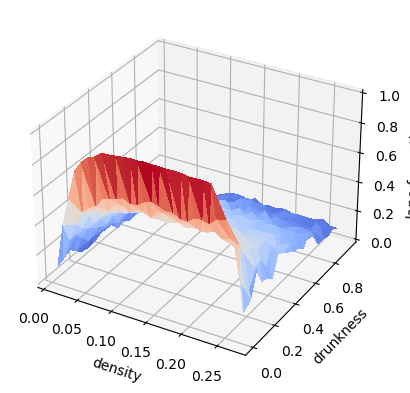

In [18]:
# surface plot, x = rho, y=p, z=phi

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# plot the surface
ax.plot_trisurf(
    [rho for rho,_,_ in data_points], 
    [1-p for _,p,_ in data_points], 
    [phi for _,_,phi in data_points], 
    linewidth=0, antialiased=False, cmap=cm.coolwarm)

ax.set_xlabel('density')
ax.set_ylabel('drunkness')
ax.set_zlabel('lane formation $\\phi$')
ax.set_zlim(0, 1)
plt.show()

In [19]:
import numpy as np
import scipy.stats as stats

run = 0
rho = 0.1
L=50
iterations = 20000
phi_values = np.genfromtxt(f'./results/run_{run}_rho_{rho}_L_{L}_iters_{iterations}.csv', delimiter = ',', skip_header=1)
phi_values = phi_values[:,1]
for i in range(iterations):
    if i > 5200:
        slope, intercept, r, p_values, se = stats.linregress([np.linspace(0, 4999, 5000), phi_values[i-5000:i]])
        if p_values > 0.05:
            print(i, p_values)

FileNotFoundError: ./results/run_0_rho_0.1_L_50_iters_20000.csv not found.